# Make Calibration WAV Files, Continuously Moving From One Frequency to Another
## By Terry Bondy, VA3TYB

In [1]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))
%plot --format svg
# format long

Last updated: Sunday  5 January 2020 UTC

In [2]:
fcLow = 200;
fcHigh = 2600;

In [3]:
# If want to have 1 Hz per second at its fastest, then how many seconds?
(log(fcHigh)-log(fcLow))/(log(fcHigh)-log(fcHigh-1))

ans =  6667.6


In [4]:
# hours?
ans/(60*60)

ans =  1.8521


In [5]:
# too many hours

In [6]:
# How many octaves?
numOctaves = log(fcHigh/fcLow)/log(2)

numOctaves =  3.7004


In [7]:
steps = 37; # From ~3.7 octaves, with 10 steps per octave
mult = exp(log(fcHigh/fcLow)/steps);
freq = fcLow;
for step = 1:steps+1
  step, freq
  freq *= mult;
endfor

step =  1
freq =  200
step =  2
freq =  214.36
step =  3
freq =  229.74
step =  4
freq =  246.23
step =  5
freq =  263.91
step =  6
freq =  282.85
step =  7
freq =  303.16
step =  8
freq =  324.92
step =  9
freq =  348.24
step =  10
freq =  373.24
step =  11
freq =  400.03
step =  12
freq =  428.75
step =  13
freq =  459.52
step =  14
freq =  492.51
step =  15
freq =  527.86
step =  16
freq =  565.76
step =  17
freq =  606.37
step =  18
freq =  649.89
step =  19
freq =  696.54
step =  20
freq =  746.54
step =  21
freq =  800.13
step =  22
freq =  857.57
step =  23
freq =  919.13
step =  24
freq =  985.10
step =  25
freq =  1055.8
step =  26
freq =  1131.6
step =  27
freq =  1212.8
step =  28
freq =  1299.9
step =  29
freq =  1393.2
step =  30
freq =  1493.2
step =  31
freq =  1600.4
step =  32
freq =  1715.3
step =  33
freq =  1838.4
step =  34
freq =  1970.4
step =  35
freq =  2111.8
step =  36
freq =  2263.4
step =  37
freq =  2425.9
step =  38
freq =  2600.0


In [8]:
# How many seconds if take 38 steps, 4 sec per?
(steps+1)*4

ans =  152


In [9]:
# Or approx 2.5 minutes

In [10]:
# Make twice as many steps
stepsPerOctave = 20
steps = floor(numOctaves*stepsPerOctave)
mult = exp(log(fcHigh/fcLow)/steps);
freq = fcLow;
for step = 1:steps+1
  step, freq
  freq *= mult;
endfor

stepsPerOctave =  20
steps =  74
step =  1
freq =  200
step =  2
freq =  207.05
step =  3
freq =  214.36
step =  4
freq =  221.92
step =  5
freq =  229.74
step =  6
freq =  237.85
step =  7
freq =  246.23
step =  8
freq =  254.92
step =  9
freq =  263.91
step =  10
freq =  273.22
step =  11
freq =  282.85
step =  12
freq =  292.83
step =  13
freq =  303.16
step =  14
freq =  313.85
step =  15
freq =  324.92
step =  16
freq =  336.38
step =  17
freq =  348.24
step =  18
freq =  360.53
step =  19
freq =  373.24
step =  20
freq =  386.40
step =  21
freq =  400.03
step =  22
freq =  414.14
step =  23
freq =  428.75
step =  24
freq =  443.87
step =  25
freq =  459.52
step =  26
freq =  475.73
step =  27
freq =  492.51
step =  28
freq =  509.88
step =  29
freq =  527.86
step =  30
freq =  546.48
step =  31
freq =  565.76
step =  32
freq =  585.71
step =  33
freq =  606.37
step =  34
freq =  627.75
step =  35
freq =  649.89
step =  36
freq =  672.81
step =  37
freq =  696.54
step =  38
freq =

In [11]:
# How many seconds if take steps, 4 sec per?
(steps+1)*4

ans =  300


In [12]:
# Or 5 minutes

In [13]:
sampleRate = 16000;
dwellPeriod = 3;
transPeriod = 1;

In [14]:
Ttrans = 0:1/sampleRate:transPeriod;
TransRC = 1 + (mult-1)*(1 - cos(2*pi*Ttrans/(transPeriod*2)))/2;

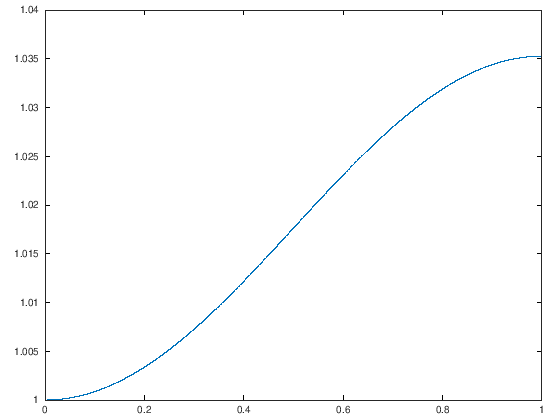

In [15]:
plot(Ttrans, TransRC)

In [16]:
Freq = fcLow .* ones(1, sampleRate*dwellPeriod+1);
for step = 1:steps
  Freq = [Freq(1:end-1), Freq(end) .* TransRC];
  Freq = [Freq(1:end-1), Freq(end) .* ones(1, sampleRate*dwellPeriod+1)];
endfor
Freq(end)

ans =  2600.0


In [17]:
size(Freq)
T = 0:1/sampleRate:(columns(Freq)-1)/sampleRate;
size(T)

ans =

         1   4784001

ans =

         1   4784001



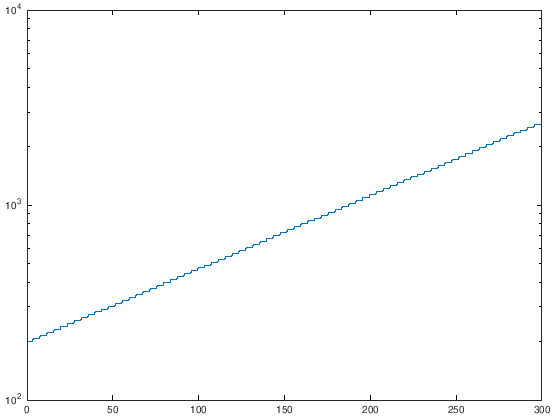

In [18]:
semilogy(T, Freq)

In [19]:
introOutroPeriod = 5;

In [20]:
# Extend Freq by introOutroPeriod
Freq = [Freq(1) .* ones(1, sampleRate*introOutroPeriod), Freq, Freq(end) .* ones(1, sampleRate*introOutroPeriod)];
# And extend T 
T = 0:1/sampleRate:(columns(Freq)-1)/sampleRate;

In [21]:
PilotFreq = 721;
Pilot = cos(2*pi*PilotFreq * T);

In [22]:
Sig = cos(2*pi*Freq .* T);

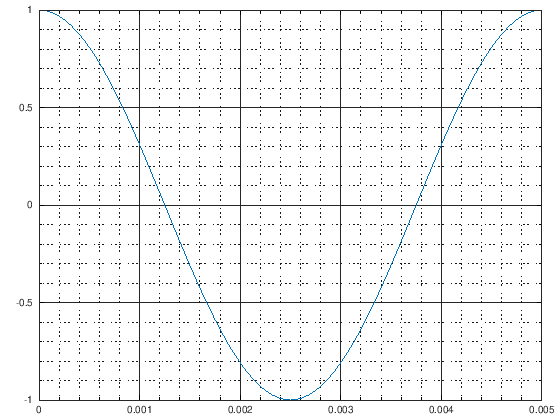

In [23]:
plot(T,Sig)
grid on
grid minor
axis([0 1/200], "tic")

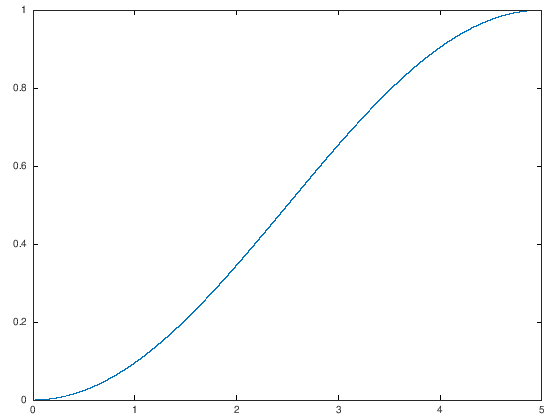

In [24]:
Tintro = 0:1/sampleRate:introOutroPeriod;
RCintro = (1 - cos(2*pi*Tintro/(introOutroPeriod*2)))/2;
plot(Tintro, RCintro)

In [25]:
period = (columns(T)-1)/sampleRate

period =  309


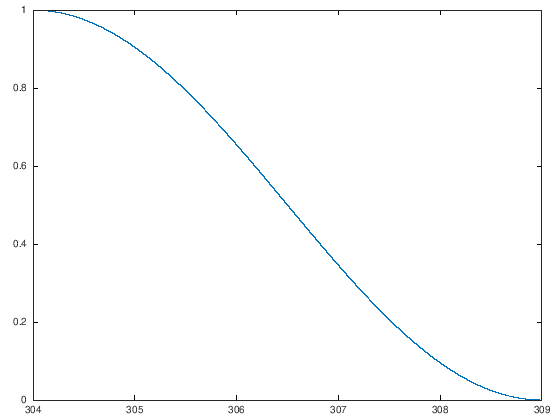

In [26]:
Toutro = (period-introOutroPeriod):1/sampleRate:period;
RCoutro = flip(RCintro);
plot(Toutro, RCoutro)

In [27]:
Envelope = [RCintro(1:end-1), ones(1, (period-2*introOutroPeriod)*sampleRate), RCoutro(1:end)];
SigTot = (Pilot .+ Sig) .* Envelope;

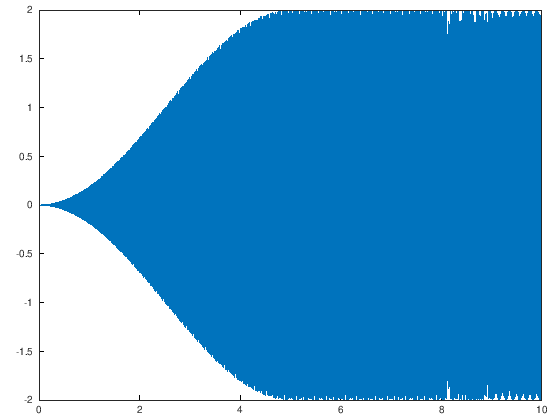

In [28]:
plot(T, SigTot)
axis([0 10])

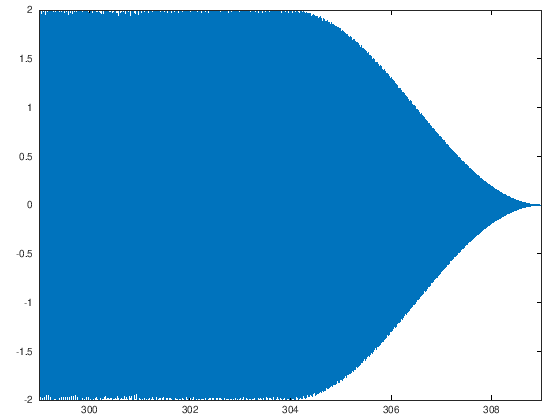

In [29]:
plot(T, SigTot)
axis([period-10 period])

In [30]:
calibrateFilename = "calibrateGlissando.wav"

calibrateFilename = calibrateGlissando.wav


In [31]:
audiowrite(calibrateFilename, SigTot ./ max(abs(SigTot)), sampleRate, 
"Title", "Rising Tone + Pilot Tone Calibration file for Yaesu radioes.",
"Artist", "Terry Bondy, VA3TYB")

In [32]:
audioinfo(calibrateFilename)

ans =

  scalar structure containing the fields:

    Filename = calibrateGlissando.wav
    CompressionMethod = 
    NumChannels =  1
    SampleRate =  16000
    TotalSamples =  4944001
    Duration =  309.00
    BitsPerSample =  16
    BitRate = -1
    Title = Rising Tone + Pilot Tone Calibration file for Yaesu radioes.
    Artist = Terry Bondy, VA3TYB
    Comment = 



In [33]:
[y, fs] = audioread(calibrateFilename);
size(y)
fs

ans =

   4944001         1

fs =  16000


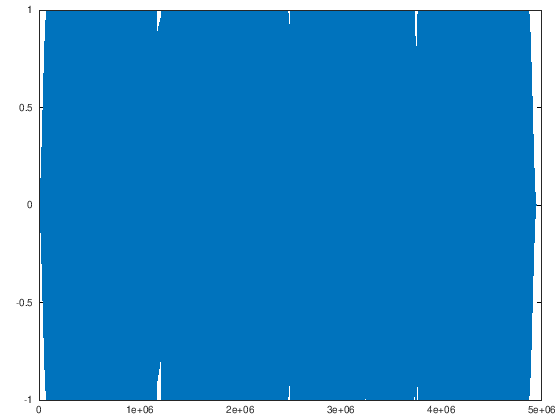

In [34]:
plot(y)